# Mistrzowski zestaw pokemonów
### Projekt kaggle: https://www.kaggle.com/lrcusack/pokemontrainers

## *Cel statystyczny:* 
#### Ograniczając się do pewnej, maksymalnej liczby zebranych pokemonów, należy określić potencjalnie najlepszy zestaw w starciu z jakimkolwiek innym przeciwnikiem.
## *Cel Python:* 
#### Symulator walki


#### Autorzy: Krzysztof Milimen, Michał Pawłowski, Grzegorz Sochaj

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import ipywidgets as widgets
from IPython.display import display, clear_output
from functools import reduce

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
pokemon_df = pd.read_sql_query("SELECT * from Pokemon", con)
trainers_df = pd.read_sql_query("SELECT * from Trainers", con)
trainers_cp_df = pd.read_sql_query("SELECT t.*,sum((p.hp+p.attack+p.defense+p.spatk+p.spdef+p.speed)*p.pokelevel *6/100) as 'Combat Power Sum' from Trainers t join Pokemon p on t.trainerID = p.trainerID group by t.trainerID", con)

# Verify that result of SQL query is stored in the dataframe

con.close()

# Jak wygląda baza pokemonów?

In [2]:
pokemon_df.head() # Pokemon head 

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64


In [3]:
pokemon_df.describe() # Pokemon data description

,trainerID,place,pokelevel,hp,maxhp,attack,defense,spatk,spdef,speed
count,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000
mean,5868.511700,1.182614,40.442508,120.074712,120.074712,80.585995,75.943827,73.859707,74.429697,74.815546
std,3354.630027,1.334142,18.236740,59.720906,59.720906,46.502081,43.869618,42.817827,43.263908,42.983738
min,0.000000,0.000000,2.000000,14.000000,14.000000,6.000000,6.000000,6.000000,6.000000,7.000000
25%,3012.000000,0.000000,28.000000,77.000000,77.000000,46.000000,44.000000,44.000000,44.000000,45.000000
50%,5873.000000,1.000000,40.000000,116.000000,116.000000,73.000000,70.000000,68.000000,68.000000,68.000000
75%,8734.250000,2.000000,50.000000,150.000000,150.000000,105.000000,98.000000,95.000000,98.000000,97.000000
max,11859.000000,5.000000,100.000000,656.000000,656.000000,361.000000,501.000000,349.000000,501.000000,361.000000


# Jakie typy pokemonów są najbardziej popularne w bazie danych?

In [4]:
pokemon_df["type1"].value_counts()

Water       5723
Normal      4368
Grass       2420
Bug         2292
Fighting    1945
Electric    1927
Poison      1658
Fire        1574
Rock        1350
Ground      1162
Psychic     1127
Dark         714
Dragon       581
Ghost        569
Steel        547
Ice          516
Fairy        328
Flying         3
Name: type1, dtype: int64

In [5]:
def count_of_pokemon_types():
    sns.set_style("white")
    sns.set_context("notebook")
    plt.figure(num=None, figsize=(9, 7), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle('Count of pokemon types', fontsize=22)
    pokemon_df["type1"].value_counts().plot(kind='bar',color="c")
    plt.show()

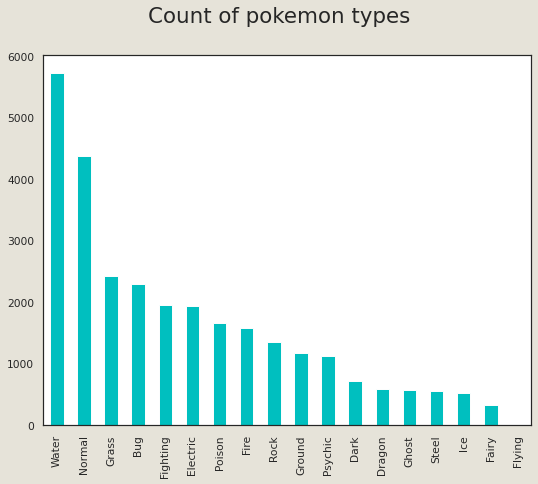

In [6]:
count_of_pokemon_types()

# Jak wygląda baza trenerów?

In [7]:
trainers_df.head() # Trainers head

,trainerID,trainername
0,0,A-list Actor Alonso
1,1,A-list Actor Ricardo
2,2,Ace Duo Elina & Sean
3,3,Ace Duo Jude & Rory
4,4,Ace Duo Jude & Rory


In [8]:
trainers_df.describe()

,trainerID
count,11860.000000
mean,5929.500000
std,3423.831431
min,0.000000
25%,2964.750000
50%,5929.500000
75%,8894.250000
max,11859.000000


In [9]:
pokemon_df["Combat Power"] = (pokemon_df["hp"]+pokemon_df["attack"]+pokemon_df["defense"]+pokemon_df["spatk"]+pokemon_df["spdef"]+pokemon_df["speed"])*pokemon_df["pokelevel"]*6/100
pokemon_df.describe()

,trainerID,place,pokelevel,hp,maxhp,attack,defense,spatk,spdef,speed,Combat Power
count,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000
mean,5868.511700,1.182614,40.442508,120.074712,120.074712,80.585995,75.943827,73.859707,74.429697,74.815546,1476.400578
std,3354.630027,1.334142,18.236740,59.720906,59.720906,46.502081,43.869618,42.817827,43.263908,42.983738,1474.132342
min,0.000000,0.000000,2.000000,14.000000,14.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.520000
25%,3012.000000,0.000000,28.000000,77.000000,77.000000,46.000000,44.000000,44.000000,44.000000,45.000000,530.400000
50%,5873.000000,1.000000,40.000000,116.000000,116.000000,73.000000,70.000000,68.000000,68.000000,68.000000,1184.040000
75%,8734.250000,2.000000,50.000000,150.000000,150.000000,105.000000,98.000000,95.000000,98.000000,97.000000,1963.920000
max,11859.000000,5.000000,100.000000,656.000000,656.000000,361.000000,501.000000,349.000000,501.000000,361.000000,10266.000000


# Rozkład zmiennej Combat Power

In [10]:
def combat_power_histogram():
    sns.set_style("white")
    sns.set_context("notebook")
    plt.figure(num=None, figsize=(12, 10), dpi=67, facecolor='#E6E3D9', edgecolor='k').suptitle('Combat power histogram', fontsize=22)
    plt.hist(pokemon_df['Combat Power'], bins=40, color="#289D13")
    plt.xlabel("Combat power")
    plt.ylabel("Pokemon count")
    plt.show()

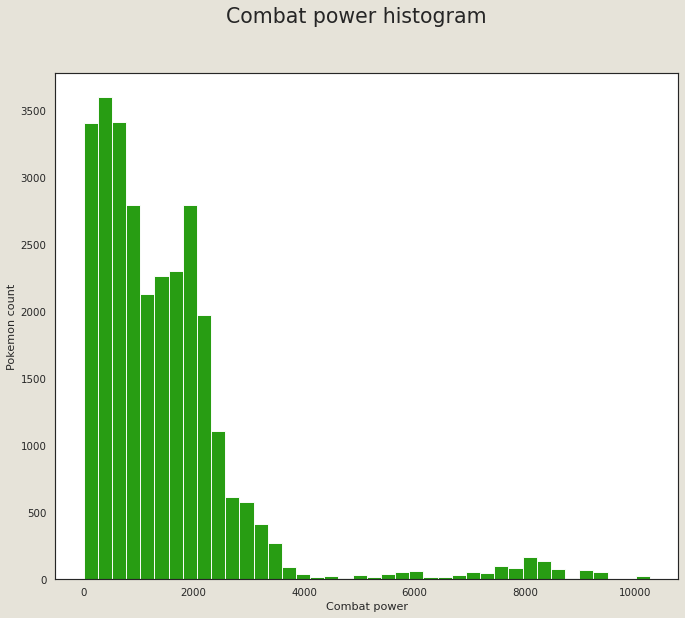

In [11]:
combat_power_histogram()

# Rozkład zmiennej Pokelevel

In [12]:
def pokelevel_histogram():
    sns.set_style("white")
    sns.set_context("notebook")
    plt.figure(num=None, figsize=(12, 10), dpi=67, facecolor='#E6E3D9', edgecolor='k').suptitle('Pokelevel histogram', fontsize=22)
    plt.hist(pokemon_df['pokelevel'], bins=30, color="#289D13")
    plt.xlabel("Pokelevel")
    plt.ylabel("Pokemon count")
    plt.show()

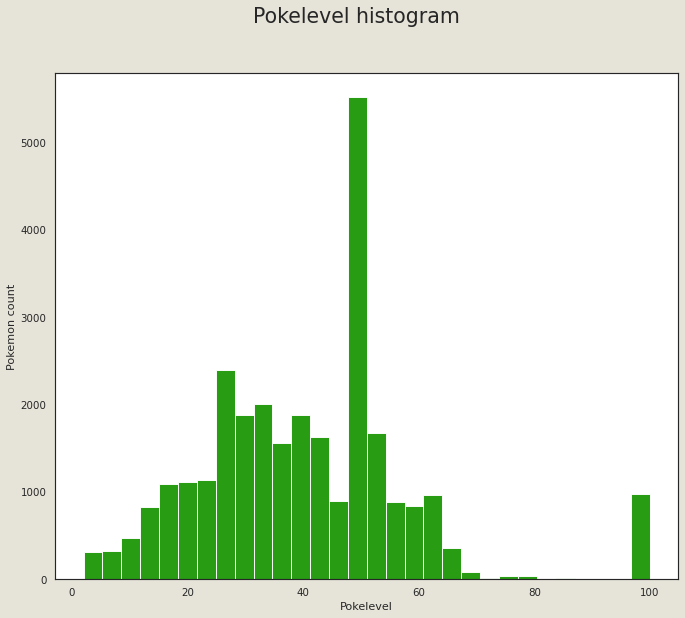

In [13]:
pokelevel_histogram()

# Matryca korelacji pomiędzy statystykami pokemona

In [14]:
def correlation_matrix_stats():
    corr = pokemon_df[["pokelevel","hp","attack","defense","spatk","spdef","speed","Combat Power"]].corr()
    plt.figure(num=None, figsize=(12, 10), dpi=67, facecolor='#E6E3D9', edgecolor='k').suptitle('Correlation matrix between statistics', fontsize=22)
    sns.heatmap(corr,cmap="ocean",vmax=1,vmin=0,annot=True,linewidths=1,linecolor="black")
    plt.tight_layout()

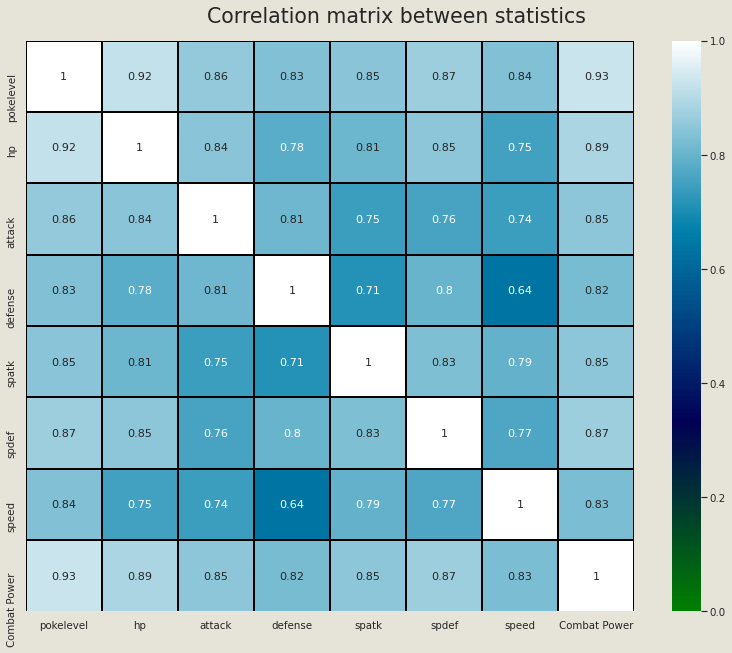

In [15]:
correlation_matrix_stats()

# Analiza statystyk poszczególnych typów pokemonów

In [16]:
def widget_exploring_data():
    slowniczek = {
            "Minimum": pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").min(),
            "Maximum" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").max(),
            "Average" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").mean(),
            "Mode" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").median(),
            "Standard deviation" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").std()
            }
    default = 'Minimum'

    plt.figure(num=None, figsize=(12, 10), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle(f'{default} values / Type of Pokemon', fontsize=22)
    sns.heatmap(data = slowniczek[default],annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black")
    plt.tight_layout()

    w = widgets.Dropdown(
        options=slowniczek.keys(),
        value = default,
        description='List',
    )

    display(w)       

    def on_change(change):
        if change['name'] == 'value' and (change['new'] != change['old']):
            clear_output()
            display(w)
            xxx = change['new']
            plt.figure(num=None, figsize=(12,10), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle(f'{xxx} values / Type of Pokemon', fontsize=22)
            sns.heatmap(data = slowniczek[change['new']],annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black")
            plt.tight_layout()

    w.observe(on_change)

Dropdown(description='List', index=2, options=('Minimum', 'Maximum', 'Average', 'Mode', 'Standard deviation'),…

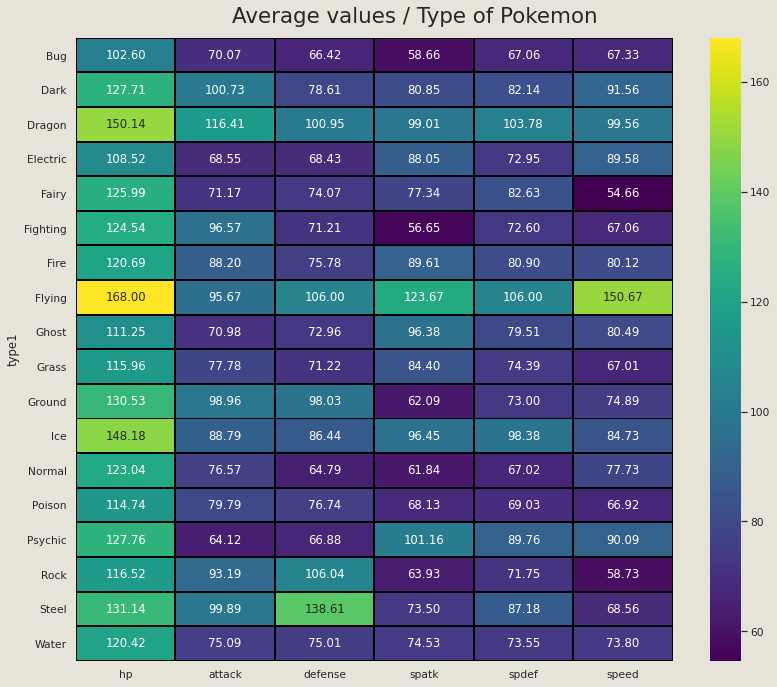

In [17]:
widget_exploring_data()

# Analiza wielkości Combat Power poszczególnych typów pokemonów 

In [18]:
x = pokemon_df[["Combat Power","type1"]].groupby("type1").mean()
y = pokemon_df[["Combat Power","type1"]].groupby("type1").median()
z = pokemon_df[["Combat Power","type1"]].groupby("type1").std()
t = pokemon_df[["Combat Power","type1"]].groupby("type1").min()
u = pokemon_df[["Combat Power","type1"]].groupby("type1").max()
data_frames = [x,y,z,t,u]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['type1'],how='left'), data_frames)
df_merged.columns = ["Average","Median","Standard deviation","Minimum","Maximum"]

def combat_power_variant():
    f, axs = plt.subplots(1, df_merged.columns.size, figsize=(12, 7),facecolor="#E6E3D9")
    for i, (s, a) in enumerate(zip(df_merged.columns, axs)):
        sns.heatmap(np.array([df_merged[s].values]).T, yticklabels=df_merged.index, xticklabels=[s], annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black", ax=a)
        if i>0:
            a.yaxis.set_ticks([])
    f.suptitle("Combat Power Description grouped by Pokemon type",fontsize=20)
    f.tight_layout()

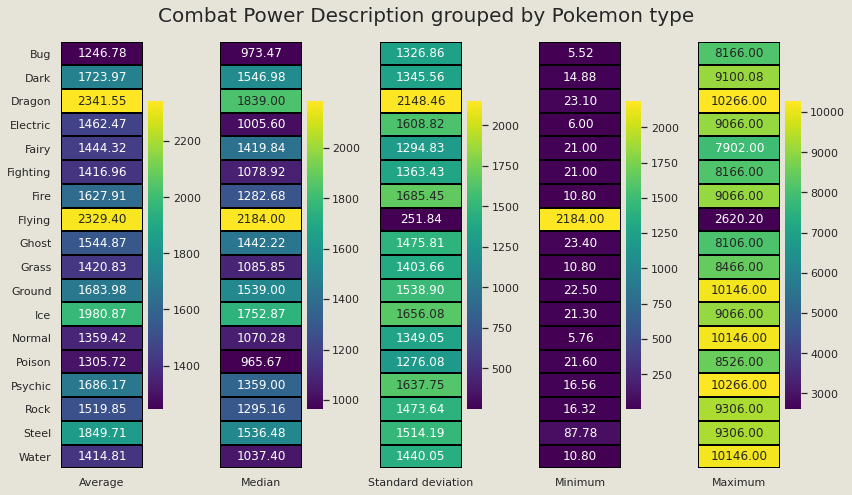

In [19]:
combat_power_variant()

# Wartość Combat Power per trener

In [20]:
trainers_cp_df.head()

,trainerID,trainername,Combat Power Sum
0,0,A-list Actor Alonso,1875
1,1,A-list Actor Ricardo,495
2,2,Ace Duo Elina & Sean,5310
3,3,Ace Duo Jude & Rory,3645
4,4,Ace Duo Jude & Rory,5130


In [21]:
def combat_power_trainers():
    sns.set_style("white")
    sns.set_context("notebook")
    plt.figure(num=None, figsize=(12, 10), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle('Combat power - Trainers histogram', fontsize=22)
    plt.hist(trainers_cp_df['Combat Power Sum'], bins=60, color="#289D13")
    plt.xlabel("Combat power")
    plt.ylabel("Trainers count")
    plt.show()

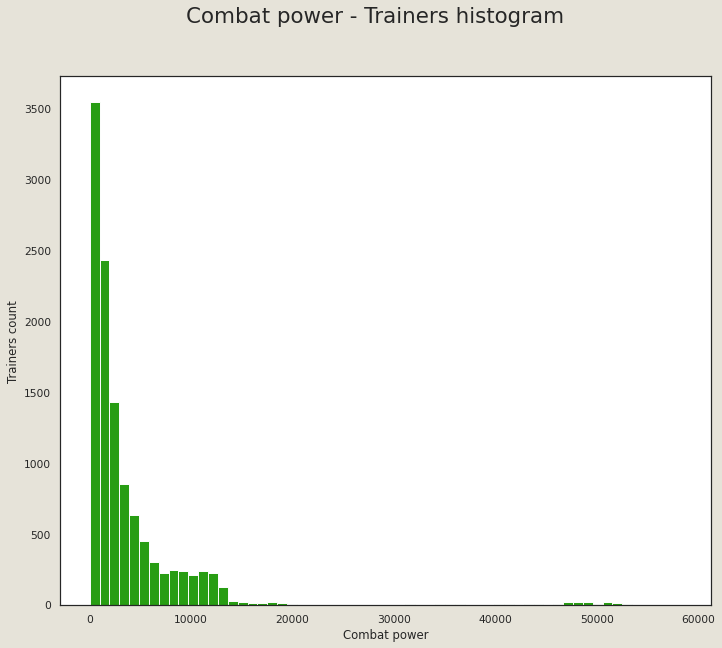

In [22]:
combat_power_trainers()

# Który typ pokemona jest najlepszy?

In [44]:
mistrzowskie_typy = pd.read_csv("pokemon_type_max.csv",sep=";")
del mistrzowskie_typy["type"]

In [46]:
mistrzowskie_typy.head(10)

,type1,type2,Combat Power
0,Dragon,Electric,2817.36
1,Dragon,Fire,2817.36
2,Normal,None,2683.62
3,Electric,Flying,2591.70
4,Fire,Flying,2591.70
5,Ground,None,2589.00
6,Water,None,2589.00
7,Fire,None,2588.52
8,Dark,Dragon,2558.40
9,Dragon,Flying,2558.40


In [25]:
# number of pokemon taken under consideration depends on worst possible scenario for the 3rd best combat
# power pokemon value.

highest = 1.4
lowest = 0.51
cp_threshold = 9306.0 * lowest /highest
ligue = pokemon_df[pokemon_df["Combat Power"] > cp_threshold]
ligue["Wins"]=0
ligue

<ipython-input-25-51954f32b39a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue["Wins"]=0


,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,Combat Power,Wins
2477,1093,2,Mamoswine,65,Ice,Ground,241,241,197,132,119,106,132,3615.30,0
2499,1103,1,Klinklang,65,Steel,None,176,176,158,177,119,138,145,3560.70,0
2501,1104,0,Tauros,66,Normal,None,198,198,160,154,81,121,173,3512.52,0
2502,1104,1,Wailord,66,Water,None,324,324,147,88,147,88,107,3567.96,0
2513,1110,0,Purugly,68,Normal,None,199,199,141,116,116,109,181,3516.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28258,11602,0,Ursaring,100,Normal,None,326,326,301,191,191,191,151,8106.00,0
28259,11602,1,Furret,100,Normal,None,316,316,193,169,131,151,221,7086.00,0
28428,11696,0,Primeape,100,Fighting,None,276,276,251,161,161,181,231,7566.00,0
28429,11696,1,Slowbro,100,Water,Psychic,336,336,191,261,241,201,101,7986.00,0


# Matryca premii i kar w walce per typ

In [26]:
type_matrix = pd.read_csv("Type matrix.csv")
file3 = open(f"images/matrix_bonus.png", "rb")
image3 = file3.read()
third_photo = widgets.Image(
    value=image3,
    format='png',
    width=600,
    height=600,
)

In [27]:
display(third_photo)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x020\x00\x00\x020\x08\x06\x00\x00\x00\x98\xf1Qo\x00\…

# Liga najlepszych pokemonów

In [28]:
# adding columns combat power affected by type of versus pokemon

pd.options.mode.chained_assignment = None  # default='warn'

common_types = ['Normal', 'Fighting', 'Flying', 'Poison', 'Ground', 'Rock','Bug', 'Ghost', 'Steel', 'Fire', 'Water', 'Grass', 'Electric','Psychic', 'Ice', 'Dragon', 'Dark', 'Fairy']

for type_of_pokemon in common_types:
    ligue[type_of_pokemon] = range(1,len(ligue["Combat Power"])+1)

countdown = 1
for pokemon,p_type in zip(ligue["Combat Power"],ligue["type1"]):
    for pokemon_type in common_types:
        ligue[pokemon_type] = ligue[pokemon_type].replace(to_replace=countdown,value=(float(type_matrix[type_matrix["type"]==p_type][pokemon_type])*pokemon))
    countdown = countdown + 1
        


In [29]:
ligue.head()

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,...,Steel,Fire,Water,Grass,Electric,Psychic,Ice,Dragon,Dark,Fairy
2477,1093,2,Mamoswine,65,Ice,Ground,241,241,197,132,...,2581.32420,2581.3242,2581.32420,5061.42000,3615.3000,3615.30,2581.3242,5061.42000,3615.30,3615.30
2499,1103,1,Klinklang,65,Steel,None,176,176,158,177,...,2542.33980,2542.3398,2542.33980,3560.70000,2542.3398,3560.70,4984.9800,3560.70000,3560.70,4984.98
2501,1104,0,Tauros,66,Normal,None,198,198,160,154,...,2507.93928,3512.5200,3512.52000,3512.52000,3512.5200,3512.52,3512.5200,3512.52000,3512.52,3512.52
2502,1104,1,Wailord,66,Water,None,324,324,147,88,...,3567.96000,4995.1440,2547.52344,2547.52344,3567.9600,3567.96,3567.9600,2547.52344,3567.96,3567.96
2513,1110,0,Purugly,68,Normal,None,199,199,141,116,...,2511.10944,3516.9600,3516.96000,3516.96000,3516.9600,3516.96,3516.9600,3516.96000,3516.96,3516.96


In [30]:
# checking how many battles the pokemon had won

from random import *

ligue["id"] = range(1,len(ligue["Combat Power"])+1)
wins_list = []
for first_pokemon,first_cp,first_pokemon_id,first_type,first_speed in zip(ligue["pokename"],ligue[common_types].values,ligue['id'],ligue["type1"],ligue['speed']):
    wins = 0
    for versus_pokemon,versus_cp,versus_pokemon_id,versus_type,versus_speed in zip(ligue["pokename"],ligue[common_types].values,ligue['id'],ligue["type1"],ligue['speed']):
        if first_pokemon_id == versus_pokemon_id:
            pass
        elif first_cp[common_types.index(versus_type)] > versus_cp[common_types.index(first_type)]:
            wins = wins+1
        elif first_cp[common_types.index(versus_type)] < versus_cp[common_types.index(first_type)]:
            pass
        elif first_cp[common_types.index(versus_type)] == versus_cp[common_types.index(first_type)]:
            if first_speed > versus_speed:
                wins = wins+1
            elif first_speed < versus_speed:
                pass
            else:
                wins = wins+randint(0,1)
            
    wins_list.append(wins)

ligue["Wins"]= wins_list

In [31]:
# droping duplicated pokemons in the league

dropped_best_pokemons = ligue.iloc[:,0:15].drop_duplicates(subset=['pokename','pokelevel'],keep='first',ignore_index = True).nlargest(20,"Wins")

In [32]:
dropped_best_pokemons

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,Combat Power,Wins
104,1312,2,Rayquaza,100,Dragon,Flying,356,356,341,221,341,221,231,10266.00,1320
321,8043,2,Latias,100,Dragon,Psychic,306,306,201,221,261,301,261,9306.00,1301
322,8043,3,Latios,100,Dragon,Psychic,306,306,221,201,301,261,261,9306.00,1300
105,1312,3,Salamence,100,Dragon,Flying,336,336,311,201,261,201,241,9306.00,1290
195,2542,0,Mewtwo,100,Psychic,None,358,358,261,221,349,221,301,10266.00,1286
72,1268,3,Dragonite,100,Dragon,Flying,328,328,309,231,241,241,201,9306.00,1275
112,1320,0,Slaking,100,Normal,None,446,446,361,241,231,171,241,10146.00,1265
99,1285,0,Celebi,100,Psychic,Grass,346,346,241,241,241,241,241,9306.00,1202
85,1272,0,Mew,100,Psychic,None,346,346,241,241,241,241,241,9306.00,1197
310,8017,2,Hydreigon,99,Dark,Dragon,326,326,248,218,288,218,234,9100.08,1189


# Symulator walk pokemonów
 

In [33]:
# droping duplicated pokemons in the league

pokemons_to_fight = ligue.drop_duplicates(subset=['pokename','pokelevel'],keep='first',ignore_index = True).nlargest(20,"Wins")

In [34]:
import random

def pokemon_fight_simulator():
    first_pokemon = widgets.Dropdown(
        options=pokemons_to_fight["pokename"],
        value_first="Rayquaza",
        description='1st Trainer: Choose your pokemon!:',
        disabled=False,
    )

    output1 = widgets.Output()

    display(first_pokemon,output1)

    def on_change1(change):
        with output1:
            clear_output()
            file1 = open(f"images/{change['new']}.png", "rb")
            image1 = file1.read()
            first_photo = widgets.Image(
                value=image1,
                format='png',
                width=300,
                height=400,
            )
            display(first_photo)


    first_pokemon.observe(on_change1,names='value')


    second_pokemon = widgets.Dropdown(
        options=pokemons_to_fight["pokename"],
        value_second="Rayquaza",
        description='2nd Trainer: Choose your pokemon!:',
        disabled=False,
    )

    output2 = widgets.Output()

    display(second_pokemon,output2)

    def on_change2(change):
        with output2:
            clear_output()
            file2 = open(f"images/{change['new']}.png", "rb")
            image2 = file2.read()
            second_photo = widgets.Image(
                value=image2,
                format='png',
                width=300,
                height=400,
            )
            display(second_photo)

    second_pokemon.observe(on_change2,names='value')        

    fight_button = widgets.Button(
        description='Fight!',
        disabled=False,
        button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Fight!',
        icon='check'
    )

    output_button = widgets.Output()

    display(fight_button,output_button)

    def on_button_clicked(button):
        with output_button:
            clear_output()
            combat_power_pokemon1 = list(pokemons_to_fight[pokemons_to_fight["pokename"]==first_pokemon.value][list(pokemons_to_fight[pokemons_to_fight["pokename"]==second_pokemon.value]["type1"])[0]])[0]
            combat_power_pokemon2 = list(pokemons_to_fight[pokemons_to_fight["pokename"]==second_pokemon.value][list(pokemons_to_fight[pokemons_to_fight["pokename"]==first_pokemon.value]["type1"])[0]])[0]
            if combat_power_pokemon1 > combat_power_pokemon2:
                print(f"{first_pokemon.value} pokemon won with {second_pokemon.value}! Combat power score - {combat_power_pokemon1} : {combat_power_pokemon2}")
            elif combat_power_pokemon1 < combat_power_pokemon2:
                print(f"{second_pokemon.value} pokemon won with {first_pokemon.value}! Combat power score - {combat_power_pokemon2} : {combat_power_pokemon1}")
            else:
                speed_pokemon1 = list(pokemons_to_fight[pokemons_to_fight["pokename"]==first_pokemon.value]["speed"])[0]
                speed_pokemon2 = list(pokemons_to_fight[pokemons_to_fight["pokename"]==second_pokemon.value]["speed"])[0]
                if speed_pokemon1 > speed_pokemon2:
                    print(f"Pokemon {first_pokemon.value} won with {second_pokemon.value} because of higher speed - {speed_pokemon1} : {speed_pokemon2}!")
                elif speed_pokemon1 < speed_pokemon2:
                    print(f"Pokemon {second_pokemon.value} won with {first_pokemon.value} because of higher speed - {speed_pokemon2} : {speed_pokemon1}!")
                else:
                    choice = random.choice([1, 2])
                    if choice == 1:
                        print(f"First pokemon - {first_pokemon.value} luckily won with {second_pokemon.value}!")
                    else:
                        print(f"Second pokemon - {second_pokemon.value} luckily won with {first_pokemon.value}!")

    fight_button.on_click(on_button_clicked)

In [35]:
pokemon_fight_simulator()

Dropdown(description='1st Trainer: Choose your pokemon!:', options=('Rayquaza', 'Latias', 'Latios', 'Salamence…

Output()

Dropdown(description='2nd Trainer: Choose your pokemon!:', options=('Rayquaza', 'Latias', 'Latios', 'Salamence…

Output()

Button(button_style='danger', description='Fight!', icon='check', style=ButtonStyle(), tooltip='Fight!')

Output()

# Symulator walk trenerów

In [36]:
file2 = open(f"images/Fighting algorithm.png", "rb")
image2 = file2.read()
second_photo = widgets.Image(
    value=image2,
    format='png',
    width=600,
    height=600,
)


In [37]:
display(second_photo)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xc2\x00\x00\x03p\x08\x03\x00\x00\x00\xd37#\xe1\x…

# Symulacje

In [40]:
league_trainers = pd.read_csv("league_trainers.csv", sep=";")

In [41]:
league_trainers

,trainerID,trainername,wins,Combat Power Sum,pok0_id,pok0_type1,pok0_type2,pok0_cp,pok0_modcp,pok0_speed,...,pok4_modcp,pok4_speed,pok4_isaccess,pok5_id,pok5_type1,pok5_type2,pok5_cp,pok5_modcp,pok5_speed,pok5_isaccess
0,1274,Cool♀,0,10659.00,2916.0,Ground,None,1854.0,1854.0,68.0,...,1674.00,88.0,True,2921.0,Normal,None,1734.00,1734.00,53.0,True
1,1275,Cool♀,0,11499.00,2922.0,Ground,None,1854.0,1854.0,68.0,...,2094.00,108.0,True,2927.0,Normal,None,1734.00,1734.00,53.0,True
2,1276,Cool♂,0,12573.00,2928.0,Rock,Water,2064.0,2064.0,78.0,...,2319.00,123.0,True,2933.0,Bug,None,2079.00,2079.00,108.0,True
3,1277,Cool♂,0,12573.00,2934.0,Rock,Water,2064.0,2064.0,78.0,...,2319.00,123.0,True,2939.0,Bug,None,2079.00,2079.00,108.0,True
4,1282,Cooltrainer♀ Gloria,0,9123.00,2963.0,Normal,Fairy,1389.0,1389.0,43.0,...,1554.00,63.0,True,2968.0,Grass,Poison,1539.00,1539.00,53.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,11855,Youngster Wyatt,0,12144.00,28781.0,Normal,Flying,2016.0,2016.0,124.0,...,2233.92,112.0,True,28786.0,Fighting,None,2165.58,2165.58,124.0,True
711,11856,Youngster Wyatt,0,12557.00,28787.0,Fairy,None,2074.8,2074.8,70.0,...,2105.28,64.0,True,28792.0,Normal,None,2202.72,2202.72,138.0,True
712,11859,Youthful Couple River,0,9819.00,28798.0,Grass,Poison,1749.0,1749.0,78.0,...,1734.00,113.0,True,28803.0,Water,Fairy,1329.00,1329.00,63.0,True
713,11860,random_trainer,0,11439.00,28804.0,Normal,None,1899.0,1899.0,138.0,...,2049.00,103.0,True,28809.0,Water,Electric,1959.00,1959.00,90.0,True


# Wyniki

In [42]:
league_result_40 = pd.read_csv("league_result_40.csv", sep=";")

In [43]:
league_result_40.nlargest(18,"wins")

,trainerID,trainername,wins,Combat Power Sum,pok0_id,pok0_type1,pok0_type2,pok0_cp,pok0_modcp,pok0_speed,...,pok4_modcp,pok4_speed,pok4_isaccess,pok5_id,pok5_type1,pok5_type2,pok5_cp,pok5_modcp,pok5_speed,pok5_isaccess
39,10819,Tamer,36,13397.00,26657.0,Normal,None,2120.58,2120.58,135.0,...,2411.76,122.0,True,26662.0,Water,None,2154.00,2154.00,88.0,True
38,5308,Boarder Claude,34,11889.00,12868.0,Ice,Flying,1621.80,1621.80,99.0,...,1621.80,64.0,True,12873.0,Water,None,2318.16,2318.16,91.0,True
35,7947,Master Class Preston,32,12900.00,19706.0,Normal,None,2199.00,2199.00,78.0,...,2379.00,103.0,True,19711.0,Psychic,Fairy,2133.00,2133.00,103.0,True
36,9164,Psychic Mason,32,10708.00,22435.0,Normal,None,1370.88,1370.88,99.0,...,1650.48,96.0,True,22440.0,Fairy,None,2180.88,2180.88,86.0,True
37,11861,stat_trainer,32,12882.72,28814.0,Fire,Flying,2181.00,2181.00,123.0,...,2817.36,117.0,True,28813.0,Electric,Flying,2319.00,2319.00,123.0,True
34,7459,Joe's Groupie Kaitlyn,31,12924.00,18548.0,Psychic,None,2154.00,2154.00,133.0,...,2154.00,88.0,True,18553.0,Fire,None,2154.00,2154.00,88.0,True
33,7053,Guy Botken,30,12744.00,17457.0,Grass,None,2169.00,2169.00,143.0,...,1974.00,93.0,True,17462.0,Fire,Fighting,2169.00,2169.00,103.0,True
32,7969,Fun Old Lady Ludum,29,12189.00,19802.0,Bug,None,2079.00,2079.00,108.0,...,2154.00,133.0,True,19807.0,Dark,None,1839.00,1839.00,93.0,True
29,4132,Cooltrainer♂ Cruik,25,12579.00,10130.0,Fire,None,2319.00,2319.00,123.0,...,2004.00,128.0,True,10135.0,Water,Poison,2124.00,2124.00,123.0,True
30,1307,Cooltrainer♂ Dazon,25,12219.00,3063.0,Grass,None,2049.00,2049.00,73.0,...,1974.00,93.0,True,3068.0,Psychic,None,2079.00,2079.00,143.0,True
